In [30]:
# Import packages

import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
def black_scholes(S0, K, T, r, sigma, option_type = "call"):
    """
    Function will calculate the Black-Scholes option price for a European option.
    
    Parameters:
    
    S0: Stock price
    K: Strike price
    T: Time to expiration (in years)
    r: Risk-free rate (annual)
    sigma: Volatility of the stock (annual)
    option_type: 'call' or 'put'

    Returns: Option price
    """
    # Calculate d1 and d2
    d1 = (np.log(S0 / K) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate the call or put price using the Black-Scholes Equation
    if option_type == "call":
        option_price = S0 * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == "put":
        option_price = K * np.exp(-r * T) * si.norm.cdf(-d2) - S0 * si.norm.cdf(-d1)
    else:
        raise ValueError("Option type must be 'call' or 'put'")
        
    return option_price


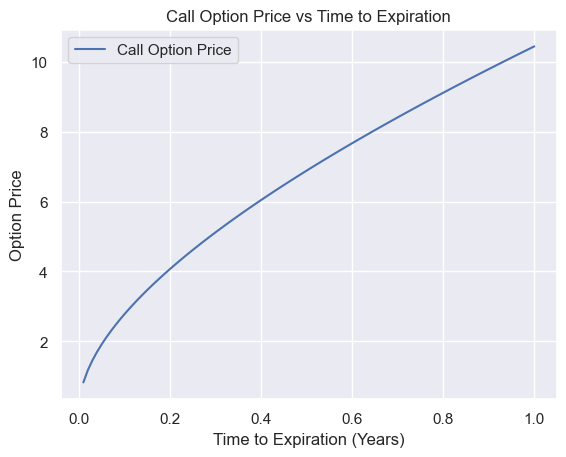

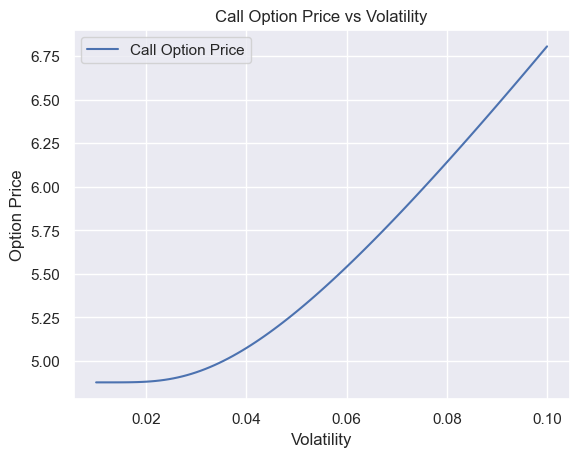

In [77]:
# Plotting Option Price vs Time to Expiration/Volatility

# Vs Time to Expiration

# Define parameters
S0 = 100  # Current stock price
K = 100   # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T_values = np.linspace(0.01, 1, 100)  # Time to expiration from 0.01 to 2 years

# Calling our function to calculate option prices at each of the different times to expiry
call_prices = [black_scholes(S0, K, T, r, sigma) for T in T_values]

# Plotting the results

sns.set(style="darkgrid")  # Applies a Seaborn style to our plots

plt.plot(T_values, call_prices, label = "Call Option Price")
plt.title("Call Option Price vs Time to Expiration")
plt.xlabel("Time to Expiration (Years)")
plt.ylabel("Option Price")
plt.grid(True)
plt.legend()
plt.show()


# Vs Volatility

# New parameters
sigma_values = np.linspace(0.01, 0.1, 100)  # Volatility values from 0.01 to 1
T = 1  # 1 year to expiry
# Other parameters are as before

# Calculate option prices for different volatilities
call_prices_volatility = [black_scholes(S0, K, T, r, sigma) for sigma in sigma_values]

# Plotting the results
plt.plot(sigma_values, call_prices_volatility, label = "Call Option Price")
plt.title("Call Option Price vs Volatility")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Plotting Option Price vs Volatility

